In [0]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt 
import os, sys
from google.colab import files

In [0]:
try:
    import progressbar # import progress bar
except ImportError:
  !pip3 install -q progressbar2
  import progressbar

In [3]:
uploaded = files.upload()

In [4]:
file = uploaded['linear_data.csv']

KeyError: ignored

In [0]:

data = np.genfromtxt(('linear_data.csv'), delimiter=',')
print(data.shape)

(1000, 3)


In [0]:
labels = data[:, -1]


In [0]:
data = data[:,:2]

In [0]:
print(data.shape)

(1000, 2)


In [0]:
positive_x = data[labels == 1, 0] 
positive_y = data[labels == 1, 1]

In [0]:
negative_x = data[labels == 0, 0]
negative_y = data[labels == 0, 1]

In [0]:
plt.scatter(positive_x, positive_y, c='r')
plt.scatter(negative_x, negative_y, c='b')
plt.show

In [0]:
print(data.shape)

(1000, 2)


In [0]:
weights = np.random.randn(2, ) * 0.01 
print(weights)

[-0.00516155 -0.00594431]


In [0]:
lr = 0.05 

In [0]:
errors = []

In [0]:
for i in range(data.shape[0]):
  x = data[i, :] 
  y = labels[i] 
  out = np.dot(x, weights) 
  out = np.round(out)
  error = y - out  
  errors.append(error) 
  weights += lr * (error * x) 

In [0]:
print(weights)

[ 1.33737784 -0.59179501]


In [0]:
all_out = np.round(np.matmul(data,weights))

In [0]:
print(all_out) 

[ 1.  0.  0.  1.  1.  0.  1.  0. -0.  0.  1.  1.  1. -0.  1.  0.  1.  1.
  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1. -0. -0.  1. -0.  1.  1.
  0.  1. -0. -0. -0.  1.  0. -0.  0.  0.  1.  1.  0.  0.  0.  1. -0.  1.
  0.  1.  1.  1.  0.  0. -0.  0. -0. -0.  0.  0.  1.  0. -0.  1.  1.  0.
  0.  1.  0.  0. -0.  1.  1.  0.  0. -0. -0.  1. -0.  1.  1.  0.  0.  0.
  1.  0. -0.  0.  1.  1. -0.  1.  0.  0.  0.  1.  1.  1. -0.  0.  0.  0.
  0.  0.  1. -0.  0.  0. -0. -0. -0.  1.  1.  0.  1.  0.  0.  1.  1.  1.
 -0.  0. -0.  1.  0.  0. -0.  1.  0.  0.  1.  0. -0.  0.  1.  1.  0. -0.
  0.  1.  0.  0. -0. -0. -0.  0.  1.  1.  0.  0.  0.  1. -0.  0.  1. -0.
  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.
 -0.  1.  0.  0.  1.  1. -0.  0.  0. -0.  1.  0.  0.  1.  0.  0.  0.  1.
  1.  1.  0.  0.  0.  1.  0.  1.  0. -0.  1.  1.  1.  0.  1.  0.  0. -0.
  0.  1.  0.  1. -0.  0. -0.  0.  1.  1.  1. -0.  1. -0. -0.  0.  0.  1.
  1.  0.  1.  0.  1.  0.  1. -0.  1.  1.  1. -0.  0

In [0]:
correct = (all_out == labels) 
print(np.mean(correct)) 

0.822


In [0]:
print(correct) 
print(np.mean(correct))

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True False False  True  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True False  True  True  True  True False False  True
  True  True  True  True False  True  True  True  True  True  True  True
 False False False  True  True  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [0]:
pred_neg = data[all_out == 0, :]
pred_pos = data[all_out == 1, :]

In [0]:
diff = labels - all_out
wrong_pred = data[diff != 0, :]

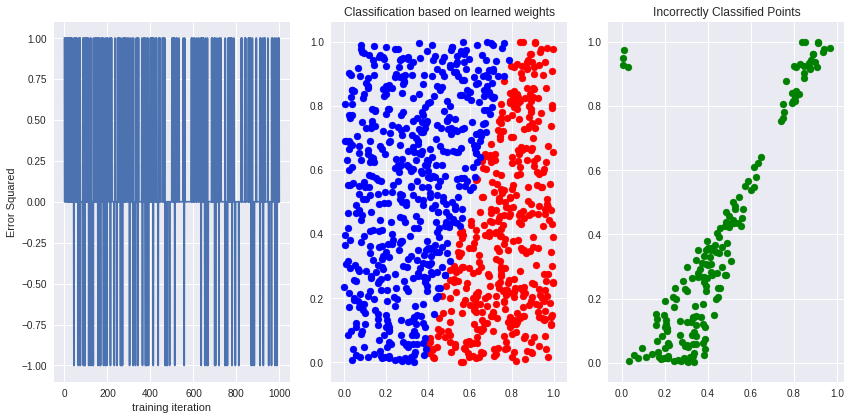

In [0]:
fig = plt.figure(figsize=(12, 6))
subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)
subplot1.set_xlabel('training iteration')
subplot1.set_ylabel('Error Squared')
subplot1.plot(errors)
subplot2.set_title('Classification based on learned weights')
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')
subplot3.set_title('Incorrectly Classified Points')
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')
plt.tight_layout()
plt.show()


Homework 2
Rerun this notebook and retrain the perceptron without a bias and print the accuracy of the network and the graphs above. Finally, explay WHY your results without the bias were very different or very similar to the results with the bias unit based on what the purpose of the bias unit is and the distribution of this dataset. Write at least 3 full sentences.

The data rift between the weighted and non weighted trainging systems was massive, over 10%, and demonstrated why a weight must be used in order to properly train networks. The weights helped keep the line of sepereation relavitly straight while the unweighted system had a nonlinear break. The bias of the network could be interpreted as the slope intercept, grouding the equation and keeping it from varying too far from the true answer. 